<a href="https://colab.research.google.com/github/dharnid/data-science/blob/main/Unstructured_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q unstructured-inference 'git+https://github.com/facebookresearch/detectron2.git@57bdb21249d5418c130d54e2ebdc94dda7a4c01a'
!apt install poppler-utils

  Preparing metadata (setup.py) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 2s (122 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!gdown 1I8Ga_BK23OA8EEv3DtAmo5zw_Quud0ew

Downloading...
From: https://drive.google.com/uc?id=1I8Ga_BK23OA8EEv3DtAmo5zw_Quud0ew
To: /content/arso.pdf
100% 2.90M/2.90M [00:00<00:00, 190MB/s]


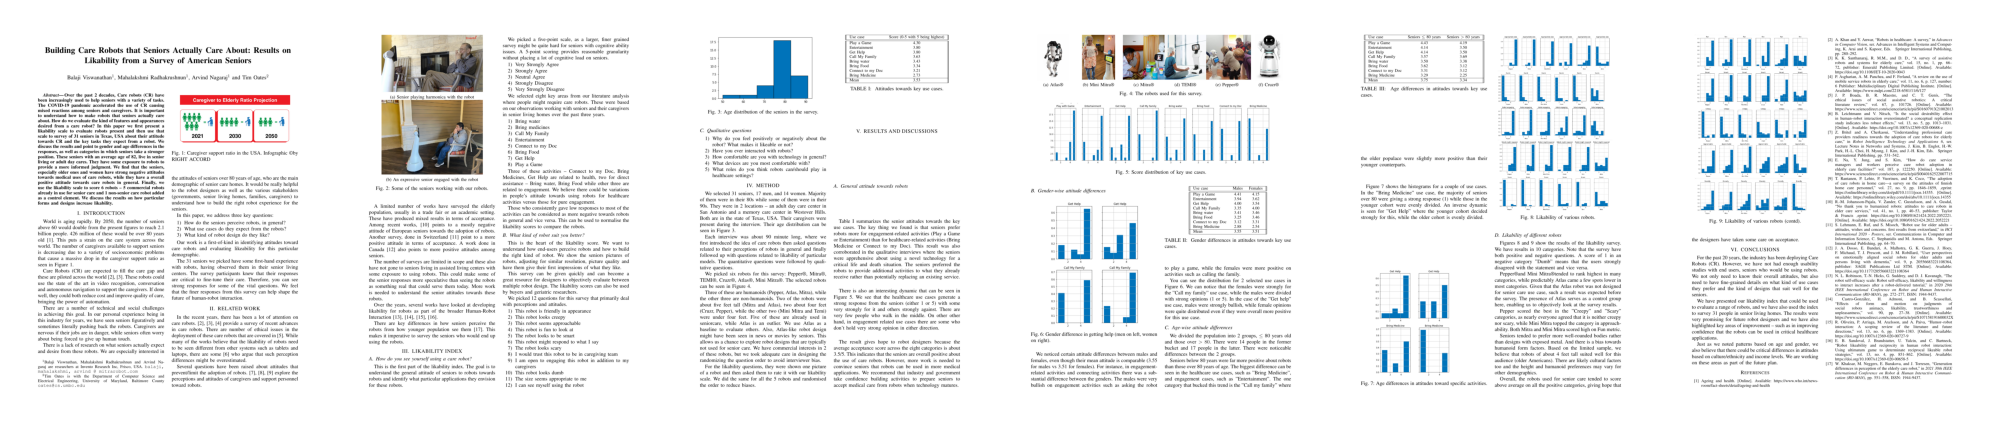

In [ ]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

raw_pages = convert_from_path("arso.pdf", dpi=200)

num_pages_to_display = min(len(raw_pages), 6)

fig, axes = plt.subplots(nrows=1, ncols=num_pages_to_display, figsize=(20, 15))

# Ensure axes is an iterable for the case of a single subplot
if num_pages_to_display == 1:
    axes = [axes]

for ax, page_image in zip(axes, raw_pages[:num_pages_to_display]):
    ax.imshow(page_image)
    ax.axis('off')  # Hide axes for a cleaner visualization

plt.tight_layout()
plt.show()

In [ ]:
from unstructured_inference.models.base import get_model
from unstructured_inference.inference.layout import DocumentLayout
layout = DocumentLayout.from_file("arso.pdf",detection_model=get_model("yolox"))

In [ ]:
pages = []

for page in layout.pages:
    size = {
        "width": page.image_metadata.get("width"),
        "height": page.image_metadata.get("height"),
    }
    elements = []
    for element in page.elements:
        bbox = element.bbox
        elements.append(
            {
                "bbox": [bbox.x1, bbox.y1, bbox.x2, bbox.y2],
                "type": element.type,
                "prob": element.prob,
                "page_no": page.number,
            }
        )
    pages.append({"number": page.number, "size": size, "elements": elements})

pages

[{'number': 1,
  'size': {'width': 1700, 'height': 2200},
  'elements': [{'bbox': [179.14373779296875,
     204.06846618652344,
     1520.444580078125,
     299.2444763183594],
    'type': 'Section-header',
    'prob': 0.5904422402381897,
    'page_no': 1},
   {'bbox': [314.0555114746094,
     355.9851379394531,
     1388.427978515625,
     385.113525390625],
    'type': 'Text',
    'prob': 0.8193370699882507,
    'page_no': 1},
   {'bbox': [146.23233032226562,
     456.4754638671875,
     832.5555419921875,
     1057.873291015625],
    'type': 'Text',
    'prob': 0.9504883885383606,
    'page_no': 1},
   {'bbox': [906.1575317382812,
     462.43646240234375,
     1513.4051513671875,
     720.822998046875],
    'type': 'Picture',
    'prob': 0.8773994445800781,
    'page_no': 1},
   {'bbox': [868.0131225585938,
     763.4617919921875,
     1547.8819580078125,
     819.9876098632812],
    'type': None,
    'prob': 0.8849466443061829,
    'page_no': 1},
   {'bbox': [872.3150634765625,
   

In [ ]:
# Create a dictionary to store the count of each unique element type
element_type_counts = {}

# Iterate through the pages and elements to collect unique types and their counts
for page in pages:
    for element in page["elements"]:
        element_type = element["type"]
        if element_type in element_type_counts:
            element_type_counts[element_type] += 1
        else:
            element_type_counts[element_type] = 1

# Print the unique element types and their counts
print("Unique element types and their counts:")
for element_type, count in element_type_counts.items():
    print(f"{element_type}: {count}")

Unique element types and their counts:
Section-header: 8
Text: 56
Picture: 12
None: 12
List-item: 52
Table: 3


In [ ]:
# Function to dump all elements of a specific type
def dump_elements_of_type(pages, target_element_type):
    elements_of_type = []

    # Iterate through pages and elements
    for page in pages:
        for element in page["elements"]:
            if element["type"] == target_element_type:
                elements_of_type.append(element)

    # Return the entire element dictionary for the given element type
    return elements_of_type if elements_of_type else None

# Call the function with your desired element type, e.g., "table"
dump_elements_of_type(pages, "Section-header")

[{'bbox': [179.14373779296875,
   204.06846618652344,
   1520.444580078125,
   299.2444763183594],
  'type': 'Section-header',
  'prob': 0.5904422402381897,
  'page_no': 1},
 {'bbox': [356.75067138671875,
   1088.728271484375,
   621.3279418945312,
   1110.624267578125],
  'type': 'Section-header',
  'prob': 0.84452223777771,
  'page_no': 1},
 {'bbox': [1071.5223388671875,
   1600.753662109375,
   1347.316650390625,
   1622.6412353515625],
  'type': 'Section-header',
  'prob': 0.8551501035690308,
  'page_no': 1},
 {'bbox': [326.575439453125,
   1829.191650390625,
   654.149658203125,
   1853.581298828125],
  'type': 'Section-header',
  'prob': 0.8422137498855591,
  'page_no': 2},
 {'bbox': [993.013671875,
   646.0087890625,
   1429.907958984375,
   672.1121826171875],
  'type': 'Section-header',
  'prob': 0.3279857933521271,
  'page_no': 3},
 {'bbox': [400.3571472167969,
   939.8994750976562,
   579.1683959960938,
   961.7282104492188],
  'type': 'Section-header',
  'prob': 0.850982964

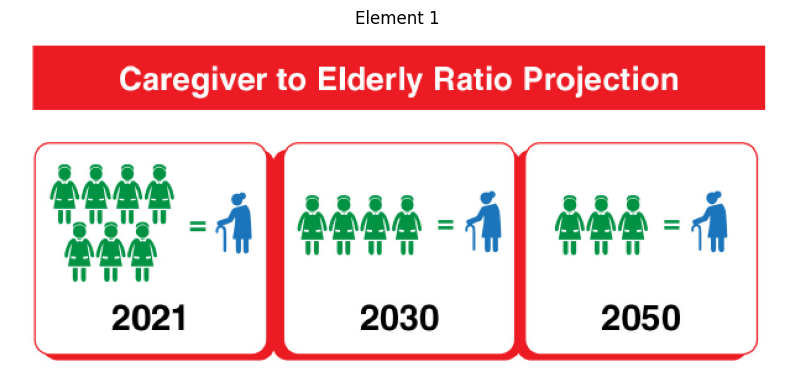

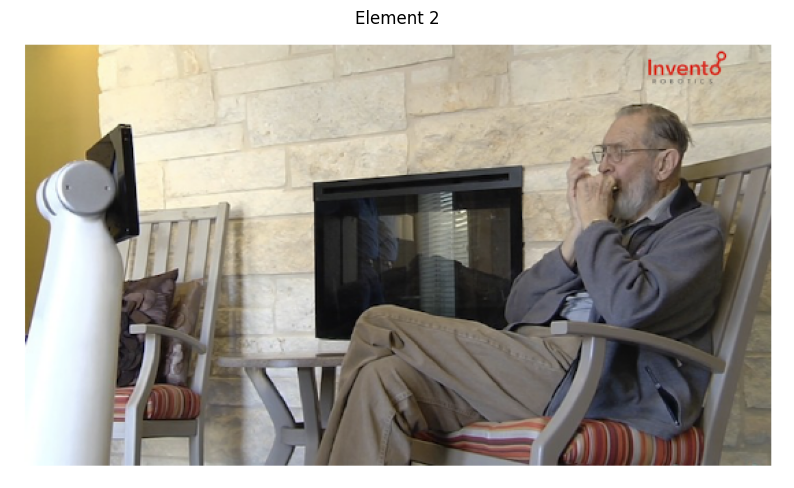

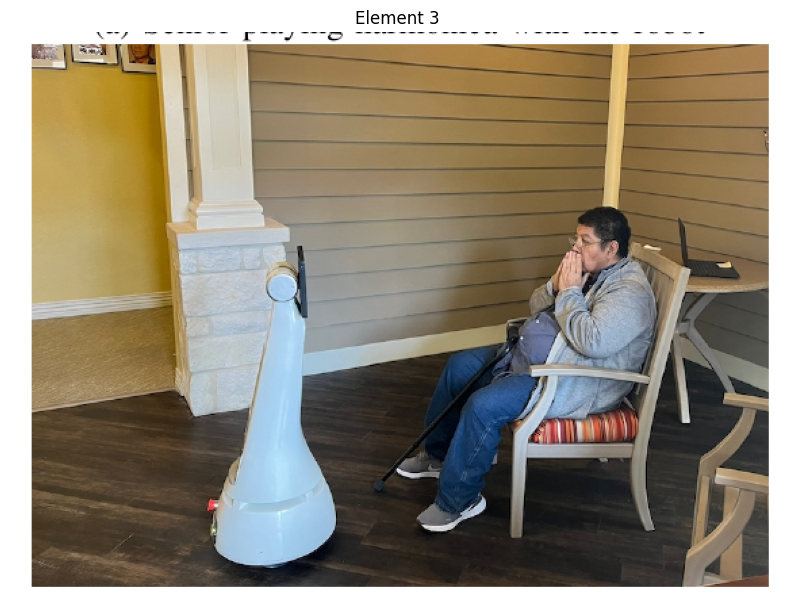

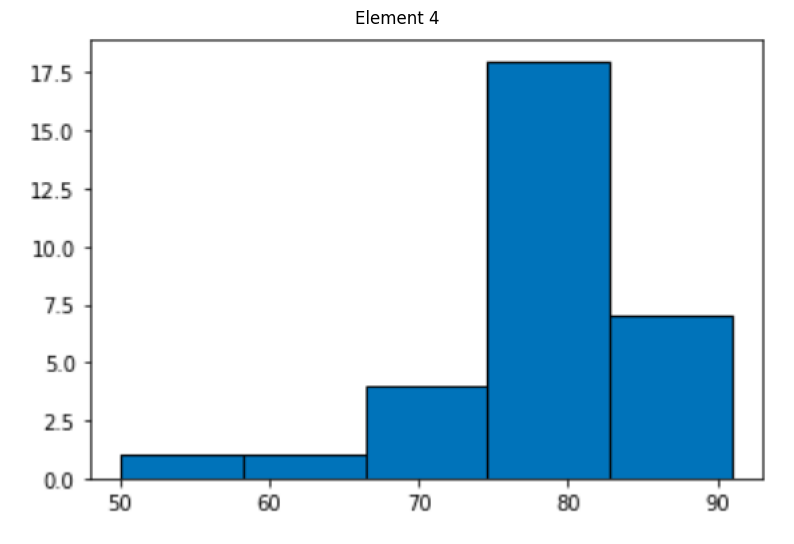

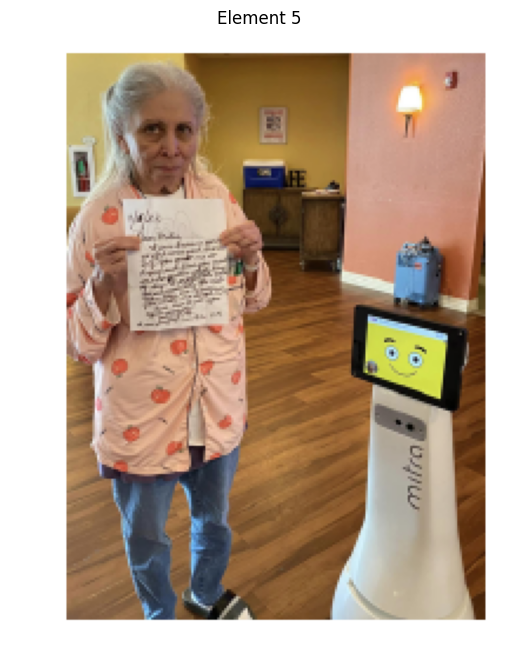

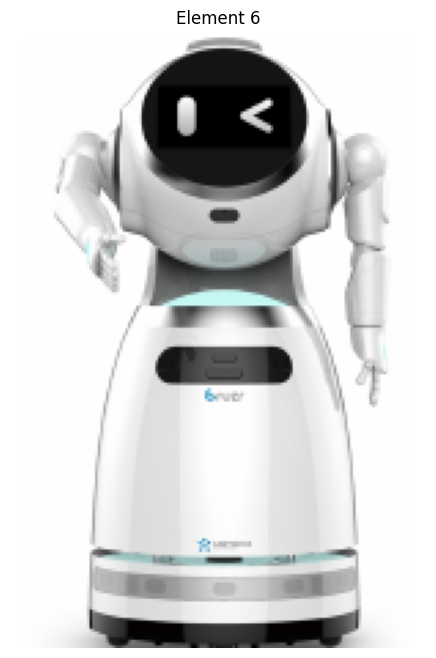

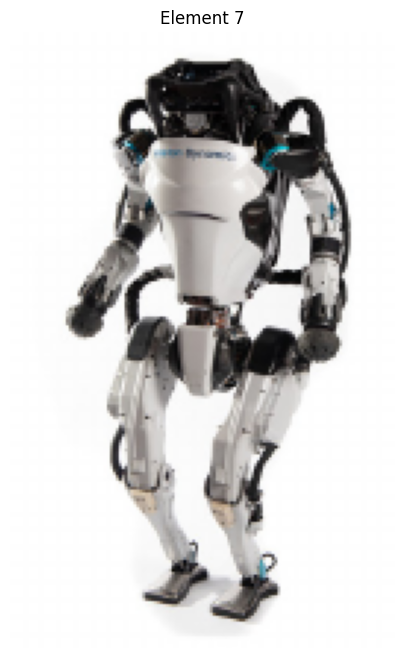

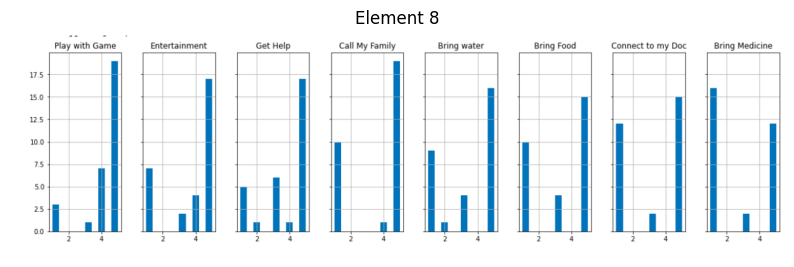

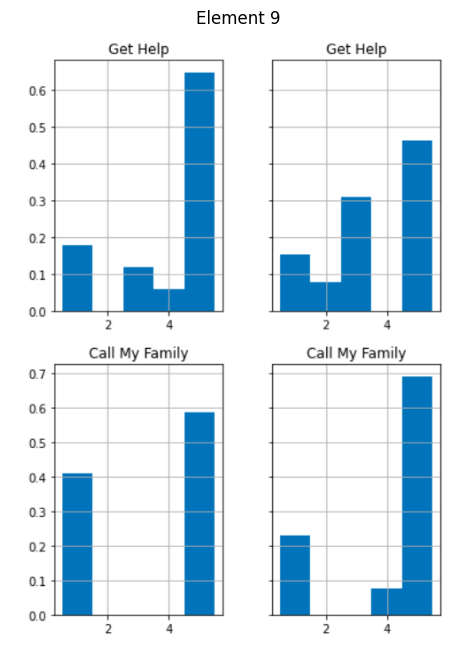

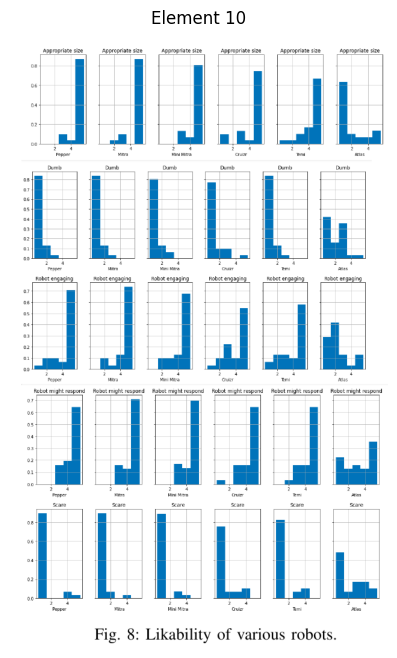

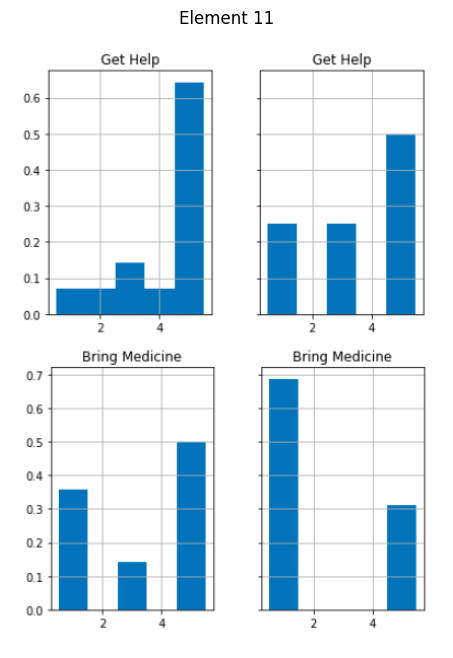

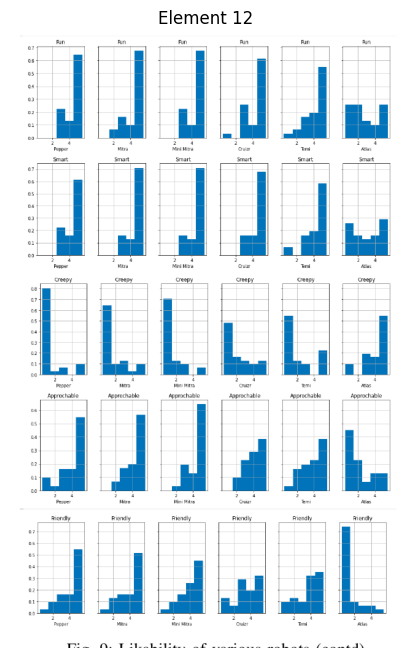

In [ ]:
def display_table_elements(pages, elements):
    for i, el in enumerate(elements):
        # Extracting coordinates for the current table
        bbox = el["bbox"]

        # Assuming all tables are on the first page (adjust this if tables are on different pages)
        page_num = el["page_no"] - 1  # Zero based

        # Get the image of the corresponding page
        page_image = raw_pages[page_num]

        # Extract bounding box coordinates from the table (x1, y1, x2, y2)
        left, upper, right, lower = bbox

        # Add padding around the table region (optional)
        pad = 10
        left, upper = left - pad, upper - pad
        right, lower = right + pad, lower + pad

        # Crop the table region from the page image
        table_region = page_image.crop((left, upper, right, lower))

        # Display the cropped table region
        plt.figure(figsize=(10, 8))
        plt.imshow(table_region)
        plt.axis('off')  # Hide axes for better visualization
        plt.title(f"Element {i + 1}")  # Title each figure with the Table number
        plt.show()
display_table_elements(pages, dump_elements_of_type(pages, "Picture"))